<a href="https://colab.research.google.com/github/hemalatha0303/mnist-mlp-image-recognition/blob/main/Image_Recognition_without_using_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
print(tf.__version__)
print(np.__version__)

2.18.0
1.26.4


In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print("Number of original training examples:", len(x_train))
print("Number of original test examples:", len(x_test))
print(type(x_train),type(x_test),type(y_train),type(y_test))
print(x_train.shape, y_train.shape,x_test.shape,y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Number of original training examples: 60000
Number of original test examples: 10000
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
# Rescale the images from [0,255] to the [0.0,1.0] range.
x_train, x_test = x_train[..., np.newaxis]/255.0, x_test[..., np.newaxis]/255.0
print(x_train.shape, y_train.shape,x_test.shape,y_test.shape)

(60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,)


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
print(x_train.shape, y_train.shape,x_val.shape, y_val.shape,x_test.shape,y_test.shape)

(48000, 28, 28, 1) (48000,) (12000, 28, 28, 1) (12000,) (10000, 28, 28, 1) (10000,)


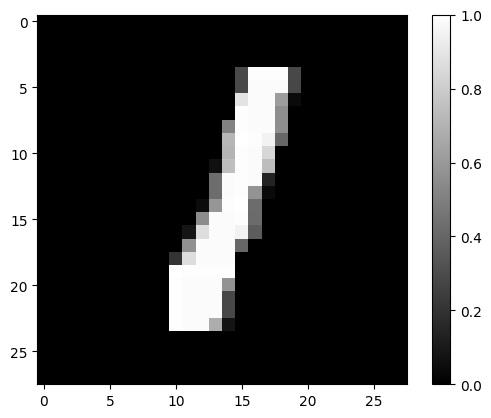

In [ ]:
plt.imshow(x_train[2, :, :, 0],cmap='gray')
plt.colorbar()

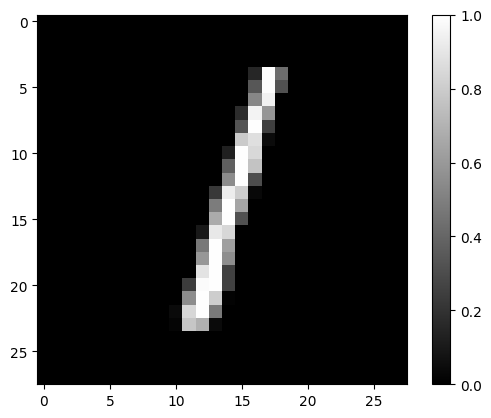

In [ ]:
plt.imshow(x_test[2, :, :, 0],cmap='gray')
plt.colorbar()

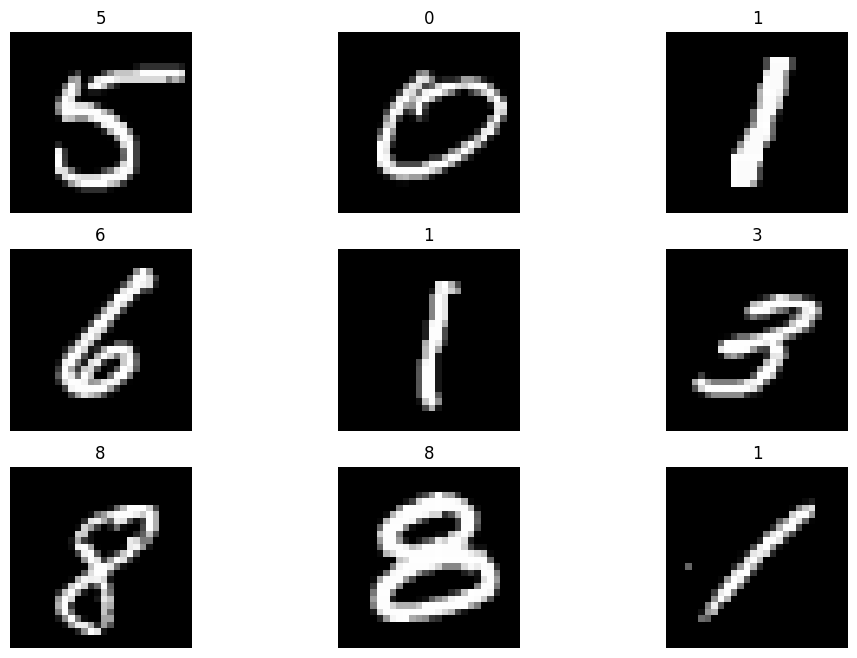

In [ ]:
plt.figure(figsize=(12, 8))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i, :, :,0],cmap='gray')
    plt.title(int(y_train[i]))
    plt.axis("off")

# With 'softmax' classifier ie. categorical cross-entropy
* Needs to encode the labels with one-hot encoding

In [ ]:
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)
y_test_cat = to_categorical(y_test)
print(y_train.shape,y_train_cat.shape, y_val.shape, y_val_cat.shape, y_test.shape, y_test_cat.shape)

(48000,) (48000, 10) (12000,) (12000, 10) (10000,) (10000, 10)


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10,activation='softmax')
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=[tf.keras.metrics.CategoricalAccuracy()],
)
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print('28*28 = ',28*28)
print('784*128 = ', 784*128)
print('784*128+128 = ', 784*128+128)
print('128*10 = ', 128*10)
print('128*10+10 = ', 128*10+10)

28*28 =  784
784*128 =  100352
784*128+128 =  100480
128*10 =  1280
128*10+10 =  1290


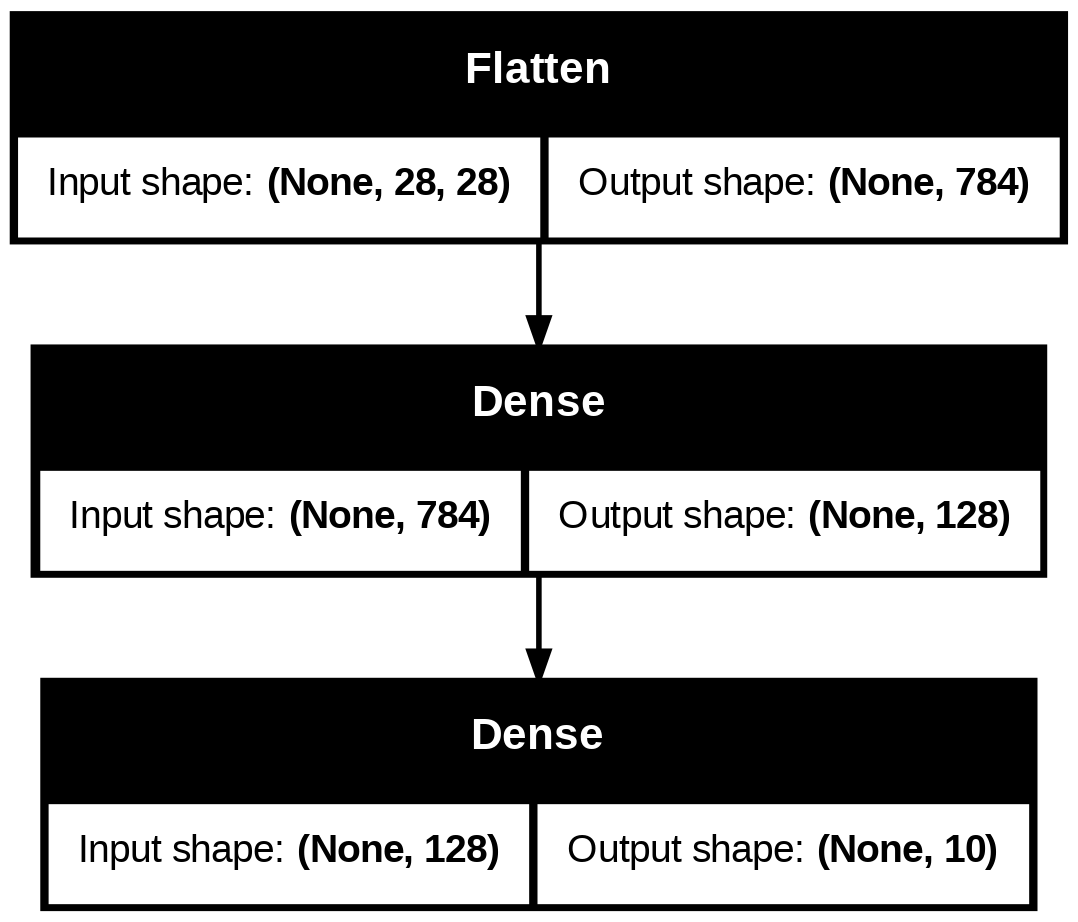

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
history = model.fit(
    x_train,y_train_cat,
    epochs=5,
    validation_data=(x_val,y_val_cat),
)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - categorical_accuracy: 0.8628 - loss: 0.4762 - val_categorical_accuracy: 0.9567 - val_loss: 0.1520
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - categorical_accuracy: 0.9610 - loss: 0.1336 - val_categorical_accuracy: 0.9606 - val_loss: 0.1276
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - categorical_accuracy: 0.9734 - loss: 0.0884 - val_categorical_accuracy: 0.9736 - val_loss: 0.0916
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - categorical_accuracy: 0.9817 - loss: 0.0627 - val_categorical_accuracy: 0.9725 - val_loss: 0.0901
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - categorical_accuracy: 0.9865 - loss: 0.0454 - val_categorical_accuracy: 0.9761 - val_loss: 0.0823


In [ ]:
1500*32

48000

In [ ]:
print(history.history.keys())

dict_keys(['categorical_accuracy', 'loss', 'val_categorical_accuracy', 'val_loss'])


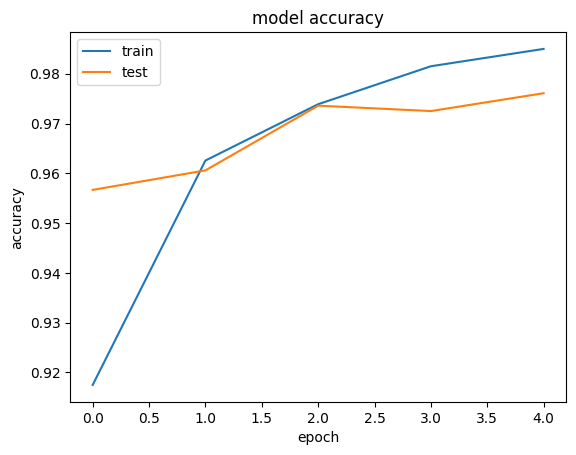

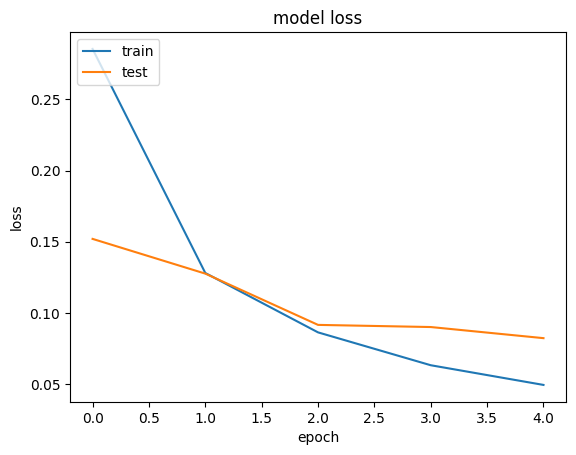

In [ ]:
# summarize history for accuracy
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Understanding confusion matrix

TP: Both prediction and label are 1. \
TN: Both prediction and label are 0. \
FP: Prediction is 1 but label is 0.\
FN: Prediction is 0 but label is 1.

[1,  1, 1, 1,  0, 0, 0, 0,  0, 1] are predictions\
[0,  1, 1, 1,  1, 1, 1, 1,  0, 0] are ground truth\
[FP, TP, TP, TP, FN, FN, FN, FN, TN, FP]

TN = 1,
FP = 2,
FN = 4, and
TP = 3

In [ ]:
num_classes = 2
prediction_arr = tf.constant([1,  1, 1, 1,  0, 0, 0, 0,  0, 1])
labels_arr     = tf.constant([0,  1, 1, 1,  1, 1, 1, 1,  0, 0])

confusion_matrix = tf.math.confusion_matrix(labels_arr, prediction_arr, num_classes)
print(confusion_matrix)

tf.Tensor(
[[1 2]
 [4 3]], shape=(2, 2), dtype=int32)


# Evaluate the performance

In [ ]:
label = tf.argmax(y_test_cat, axis = 1)
predictions = model.predict(x_test)
pred = tf.argmax(predictions, axis = 1)
print(label.shape,pred.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(10000,) (10000,)


In [ ]:
num_classes = 10
confusion_matrix = tf.math.confusion_matrix(label, pred, num_classes)
print(confusion_matrix)

tf.Tensor(
[[ 967    0    0    1    1    1    3    1    2    4]
 [   0 1122    3    2    0    1    2    1    4    0]
 [   2    1 1006    2    1    0    4    4   11    1]
 [   0    0    7  987    0    6    0    3    3    4]
 [   0    0    2    0  950    0   12    2    1   15]
 [   2    0    0    8    1  867    4    2    3    5]
 [   5    2    2    1    0    2  943    0    2    1]
 [   1    6   10   10    2    0    0  983    5   11]
 [   6    0    1    5    4    4    4    3  944    3]
 [   2    3    0    5    9    1    1    2    4  982]], shape=(10, 10), dtype=int32)


# Testing the model on data

In [ ]:
# predicting lable for test_images

predictions=model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
i = 140
# Prediction of the 1st result. It will show the 10 predictions of labels for test image
print("1. Prediction array: %s" % (predictions[i]))

# we will verify that which result for label has highest confidence
print("2. Label number having highest confidence in prediction array: %s" % (np.argmax(predictions[i])))

# let us verify what is the label in test_labels.
print("3. Actual label in dataset: %s" % (y_test[i]))

1. Prediction array: [1.8341281e-04 1.1641506e-04 1.2607743e-05 5.7522257e-06 1.6022666e-04
 6.0317747e-04 9.9884099e-01 5.2645299e-07 7.2404422e-05 4.5714023e-06]
2. Label number having highest confidence in prediction array: 6
3. Actual label in dataset: 6


In [ ]:
i=120

print(y_test[i:i+20])
print(np.argmax(predictions[i:i+20,:],axis=1))

[5 4 7 6 7 9 0 5 8 5 6 6 5 7 8 1 0 1 6 4]
[5 4 7 6 7 9 0 5 8 5 6 6 5 7 8 1 0 1 6 4]


## Creating a function to verify prediction is True or False

In [ ]:
# Defining array. Each item of array represent integer value of labels. 10 clothing item for 10 integer label.

class_names =['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
print(class_names)

['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']


In [ ]:
# creating a funtion which will help to verify the prediction is true of not

def plot_image(i, predictions_array, true_label, img): # taking index and 3 arrays viz. prediction array, true label array and image array

  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  # print(predictions_array.shape, predictions_array)
  # print(true_label.shape, true_label)

  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  # plt.imshow(img, cmap=plt.cm.binary) # showing b/w image
  plt.imshow(img, cmap=plt.cm.gray) # showing gray image

  predicted_label=np.argmax(predictions_array)

  if predicted_label == true_label: #setting up label color
    color='blue' # correct then blue colour

  else:
    color='red' # wrong then red colour

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
             color=color)

# function to display bar chart showing whether image prediction is how much correct
def plot_value_array(i, predictions_array, true_label): # taking index along with predictions and true label array
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot=plt.bar(range(10), predictions_array, color='gray')
  plt.ylim([0,1])
  predicted_label=np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

## Test for single image

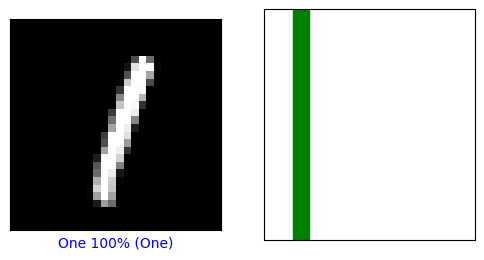

In [ ]:
# call the function

# defining parameters to pass to function
i=5 # image number 56. You may change value of i for play around

plt.figure(figsize=(6,3))

plt.subplot(1,2,1)
plot_image(i, predictions, y_test, x_test)

plt.subplot(1,2,2)
plot_value_array(i, predictions, y_test)

plt.show()

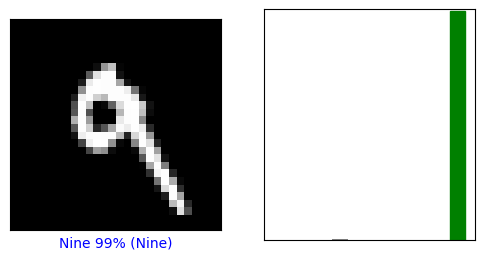

In [ ]:
# call the function

# defining parameters to pass to function
i=7 # image number 5. You may change value of i for play around
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions, y_test)
plt.show()

(28, 28, 1)
(1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
[[1.6566037e-06 2.4329245e-07 5.9129488e-06 2.3790615e-06 9.9356478e-01
  1.5280493e-05 5.6373342e-06 1.1027696e-03 1.9143954e-06 5.2993651e-03]]


4

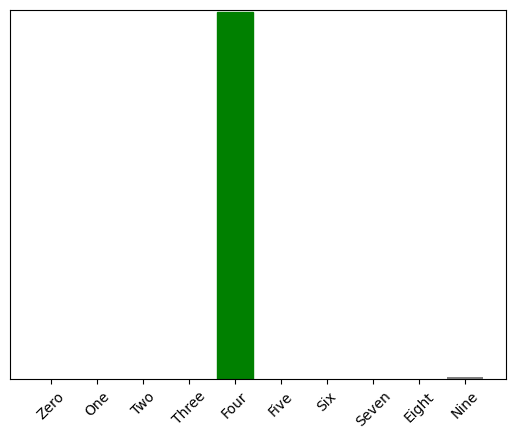

In [ ]:
# verification our prediction on single image

i=24 # image number 0. You may change value of i for play around
img = x_test[i]
print(img.shape)

img=(np.expand_dims(img,0))
print(img.shape)

predictions_single = model.predict(img)
print(predictions_single)

plot_value_array(i, predictions,y_test)
_ = plt.xticks(range(10), class_names,rotation=45)

np.argmax(predictions_single[0])

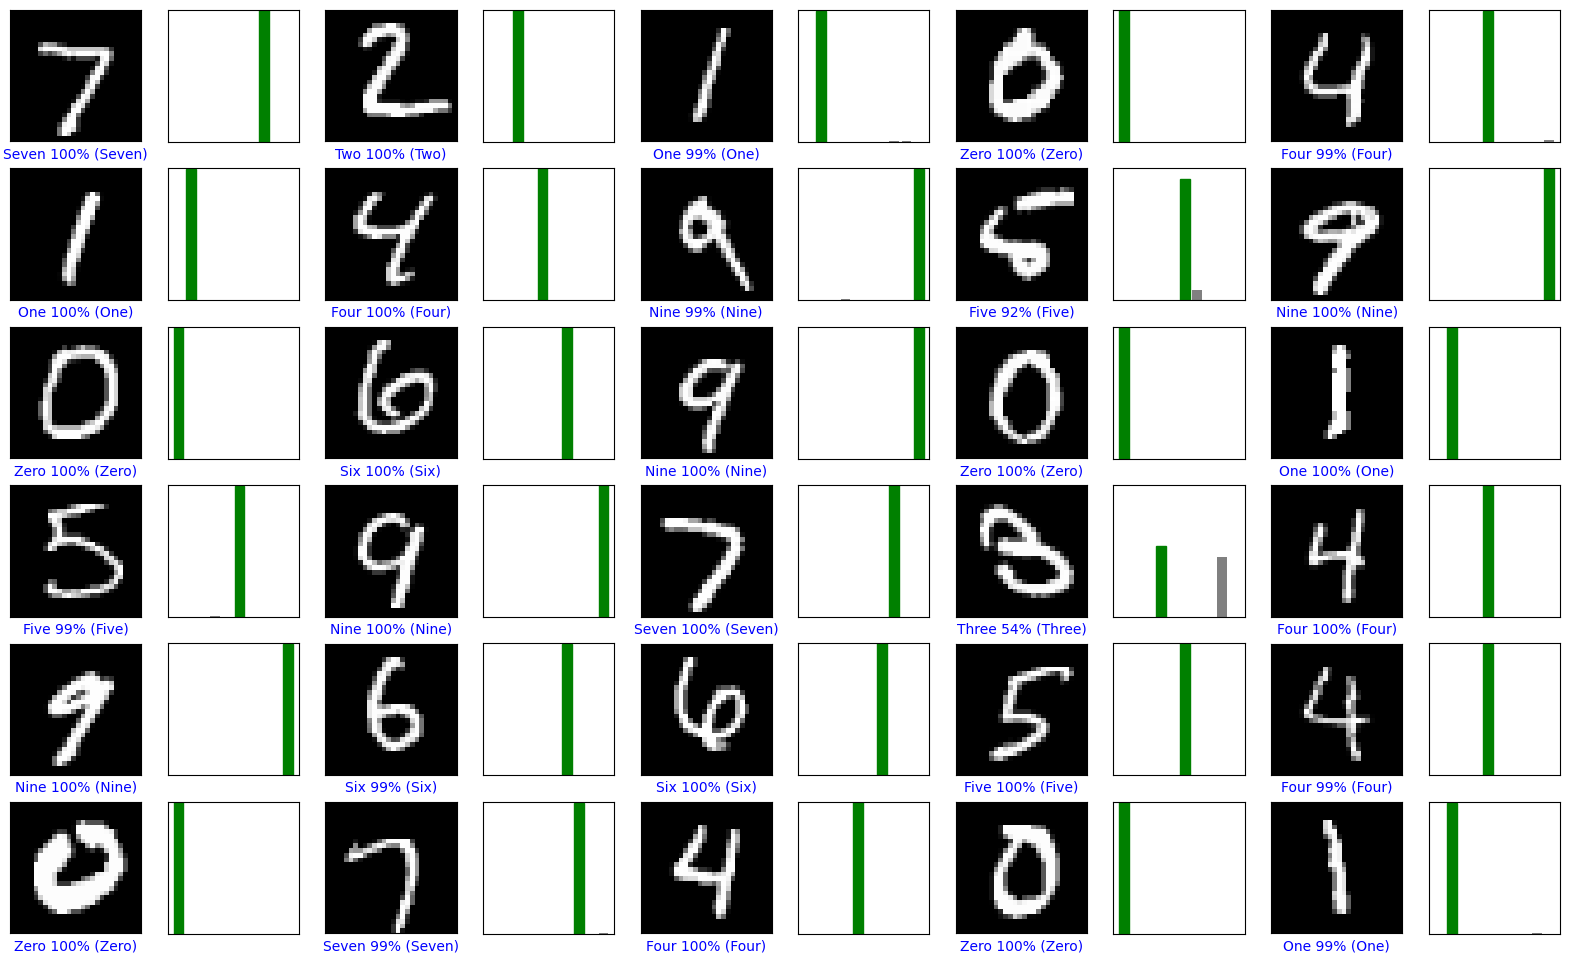

In [ ]:
# verification of several images

num_rows=6
num_cols=5
num_images=num_rows*num_cols

plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i,predictions, y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, y_test)
plt.show()

# Model evaluation on the test dataset

In [ ]:
score = model.evaluate(x_test, y_test_cat)
print('Test accuracy:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - categorical_accuracy: 0.9714 - loss: 0.0926
Test accuracy: 0.9750999808311462
